In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DataNotes.zip

Archive:  /content/drive/MyDrive/DataNotes.zip
   creating: DataNotes/test/
   creating: DataNotes/test/Fake/
  inflating: DataNotes/test/Fake/14.jpg  
  inflating: DataNotes/test/Fake/33.jpg  
  inflating: DataNotes/test/Fake/35.jpg  
  inflating: DataNotes/test/Fake/72.jpg  
  inflating: DataNotes/test/Fake/93.jpg  
  inflating: DataNotes/test/Fake/f1.png  
  inflating: DataNotes/test/Fake/f2.webp  
  inflating: DataNotes/test/Fake/f3.jpg  
  inflating: DataNotes/test/Fake/fake frnt.jpg  
  inflating: DataNotes/test/Fake/Screenshot 2023-12-15 203015.png  
  inflating: DataNotes/test/Fake/Screenshot 2023-12-15 221055.png  
  inflating: DataNotes/test/Fake/Screenshot 2023-12-15 222434.png  
  inflating: DataNotes/test/Fake/Screenshot 2023-12-15 222553.png  
  inflating: DataNotes/test/Fake/Screenshot 2023-12-15 222634.png  
   creating: DataNotes/test/Real/
  inflating: DataNotes/test/Real/12.jpg  
  inflating: DataNotes/test/Real/16.jpg  
  inflating: DataNotes/test/Real/25.jpg  
  in

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 200,500
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/DataNotes/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/DataNotes/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/DataNotes/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 323 files belonging to 2 classes.
Found 28 files belonging to 2 classes.
Found 32 files belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(200, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(200, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
    #  tf.keras.layers.Conv2D(200, 3, activation="relu"),
    #  tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(2)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
history =model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
17/17 [==============================] - 21s 535ms/step - loss: 5.5905 - accuracy: 0.6223 - val_loss: 0.5717 - val_accuracy: 0.6071
Epoch 2/10
17/17 [==============================] - 6s 327ms/step - loss: 0.4883 - accuracy: 0.8266 - val_loss: 0.4836 - val_accuracy: 0.7143
Epoch 3/10
17/17 [==============================] - 6s 329ms/step - loss: 0.1056 - accuracy: 0.9567 - val_loss: 0.2591 - val_accuracy: 0.8571
Epoch 4/10
17/17 [==============================] - 6s 328ms/step - loss: 0.1792 - accuracy: 0.9659 - val_loss: 0.3093 - val_accuracy: 0.9286
Epoch 5/10
17/17 [==============================] - 6s 323ms/step - loss: 0.0656 - accuracy: 0.9752 - val_loss: 0.1776 - val_accuracy: 0.9286
Epoch 6/10
17/17 [==============================] - 6s 324ms/step - loss: 0.0145 - accuracy: 0.9938 - val_loss: 0.6142 - val_accuracy: 0.8571
Epoch 7/10
17/17 [==============================] - 6s 329ms/step - loss: 0.0401 - accuracy: 0.9907 - val_loss: 0.2107 - val_accuracy: 0.9286
Epoch

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 498, 200)     5600      
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 249, 200)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 247, 200)      360200    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 123, 200)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1180800)           0

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 2s 2s/step - loss: 0.1433 - accuracy: 0.9688


[0.1433068811893463, 0.96875]

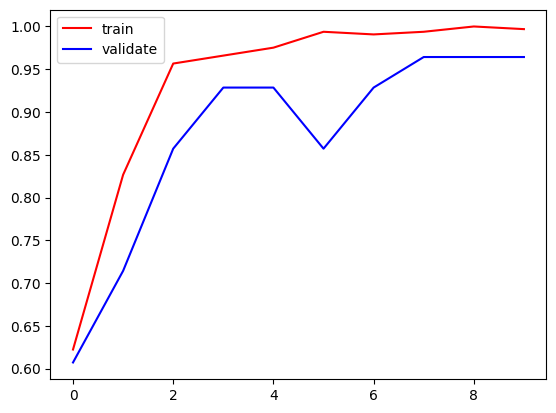

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validate')
plt.legend()
plt.show()

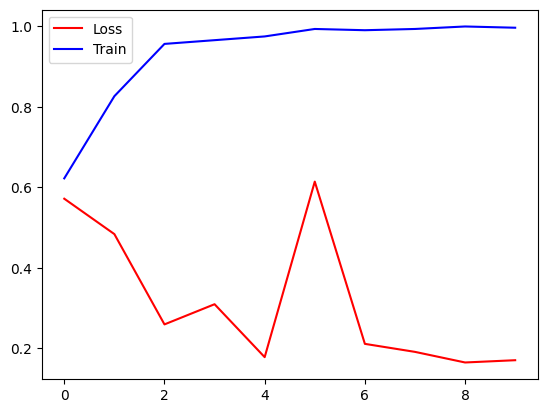

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],color='red',label='Loss')
plt.plot(history.history['accuracy'],color='blue',label='Train')
plt.legend()
plt.show()

In [ ]:
import numpy
import numpy as np
from keras.preprocessing import image
from tkinter import messagebox
def predict_note(path):
  img = image.load_img(path,target_size=(img_height,img_width))
  plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  result =numpy.argmax(model.predict(img))
  if result== 1:
      print("Message:-","Real Indian Note Detected")
  else:
      print("Message:-", "Fake Note Detected")


1/1 [==============================] - 1s 1s/step
Message:- Fake Note Detected


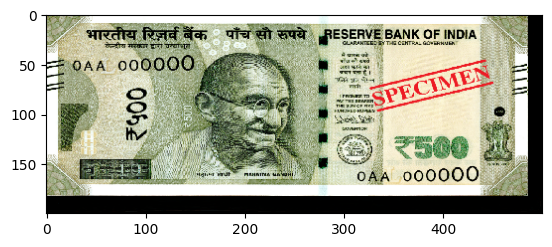

In [ ]:
predict_note("/content/DataNotes/test/Fake/f1.png")

Saving Fake5.jpg to Fake5.jpg
1/1 [==============================] - 0s 24ms/step
Message:- Fake Note Detected


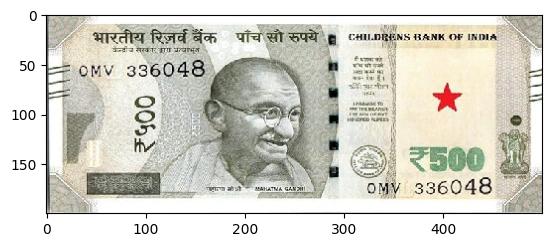

In [ ]:
from google.colab import files
import cv2
import os
uploaded = files.upload()
for fn in uploaded.keys():
  predict_note("/content/{}".format(fn))
  os.remove("/content/{}".format(fn))

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


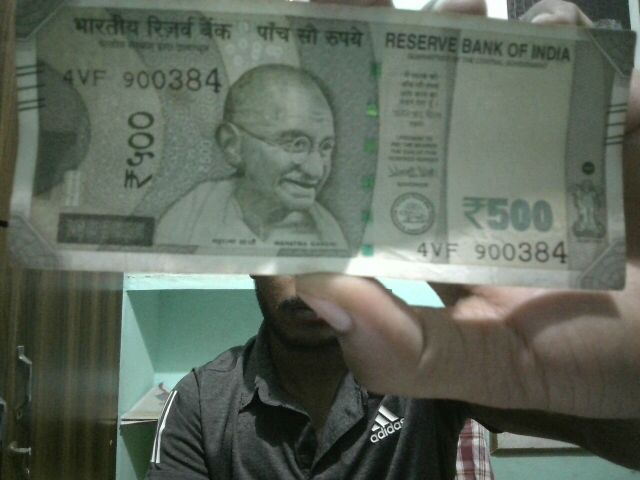

1/1 [==============================] - 0s 18ms/step
Message:- Real Indian Note Detected


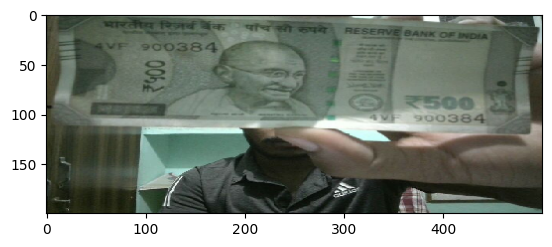

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))


  # Show the image which was just taken.
  display(Image(filename))
  predict_note(filename)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))